In [1]:
import torch
import torch.nn as nn
import numpy as np
from functools import partial

from torch.optim.lr_scheduler import StepLR

from model import NN
from functions import gaussian_loss_function
from train import training_routine, testing_routine
from visuals import plot_transformed_grid_and_density, compute_gaussian_density, compute_uniform_circle_density

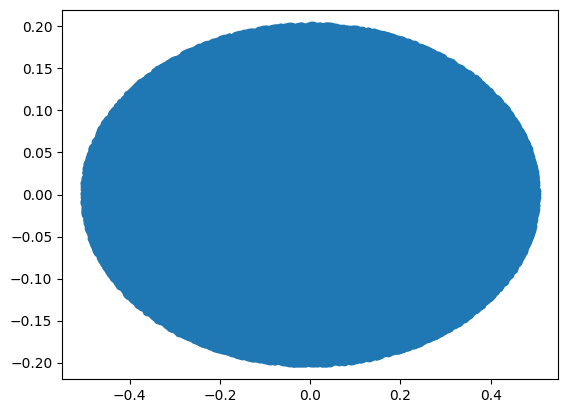

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

torch.set_default_dtype(torch.float64)
torch.manual_seed(2)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

def generate_ellipse(max_num = 10000, scale=(0.5,0.2), device='cpu'):
    data = (torch.rand((max_num,2), device=device)-0.5)*2
    dist = torch.sum(torch.square(data),axis=1)
    data = data[torch.where(dist <= 1)]
    data *= torch.tensor(scale, device=device)
    return data

training_set = generate_ellipse(max_num=100000, scale=(0.5,0.2), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(0.5,0.2), device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

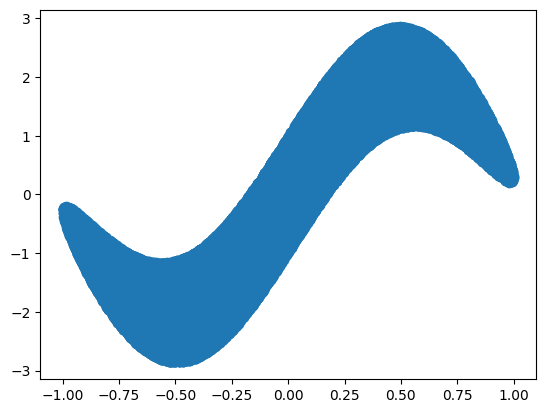

In [26]:
def generate_wave(n=100000, device='cpu'):
    train_loader = generate_ellipse(n, (1,1), device)
    train_loader[:, 1] = train_loader[:,1] + 2*torch.sin(3*train_loader[:,0])
    return train_loader
training_set = generate_wave(n=100000, device=device)
validation_set = generate_wave(n=10000, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

In [27]:
model = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)
##testNN = NN(num_coupling_layers=119, split_size_x1=1, nn_size=(1, 10)).to(device)
model.train()
model

NN(
  (layers): ModuleList(
    (0-29): 30 x CouplingLayer(
      (t_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (s_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (activation): ReLU()
    )
  )
)

In [28]:
# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [29]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [30]:
scheduler.get_last_lr()

[0.8]

In [31]:
%%time
num_epoch = 20
batch_size = 1024  # Batch size must be very large! otherwise density gets concentrated if next data point is not in reach
for epoch in range(num_epoch):
    print(epoch)
    training_routine(model, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model, validation_loader, gaussian_loss_function))
    scheduler.step()

0


77it [00:19,  4.04it/s]
62it [00:01, 32.43it/s]


tensor(6792.1063, device='cuda:0')
1


77it [00:09,  8.13it/s]
62it [00:01, 34.50it/s]


tensor(6779.4402, device='cuda:0')
2


77it [00:09,  8.37it/s]
62it [00:01, 32.05it/s]


tensor(5945.1029, device='cuda:0')
3


77it [00:09,  8.41it/s]
62it [00:01, 32.91it/s]


tensor(6366.8664, device='cuda:0')
4


77it [00:08,  8.72it/s]
62it [00:01, 32.35it/s]


tensor(5769.2375, device='cuda:0')
5


77it [00:09,  8.42it/s]
62it [00:01, 32.68it/s]


tensor(6069.1238, device='cuda:0')
6


77it [00:09,  7.81it/s]
62it [00:02, 28.92it/s]


tensor(5733.6990, device='cuda:0')
7


77it [00:09,  8.31it/s]
62it [00:01, 33.05it/s]


tensor(6291.6575, device='cuda:0')
8


77it [00:09,  8.17it/s]
62it [00:01, 32.91it/s]


tensor(5600.3970, device='cuda:0')
9


77it [00:09,  8.19it/s]
62it [00:01, 31.81it/s]


tensor(5582.1809, device='cuda:0')
10


77it [00:09,  8.05it/s]
62it [00:01, 32.26it/s]


tensor(5367.3113, device='cuda:0')
11


77it [00:09,  8.15it/s]
62it [00:01, 32.34it/s]


tensor(5459.3625, device='cuda:0')
12


77it [00:09,  8.07it/s]
62it [00:01, 32.02it/s]


tensor(5226.9941, device='cuda:0')
13


77it [00:09,  8.10it/s]
62it [00:01, 33.30it/s]


tensor(5520.3098, device='cuda:0')
14


77it [00:09,  8.13it/s]
62it [00:01, 32.38it/s]


tensor(5380.4383, device='cuda:0')
15


77it [00:09,  8.10it/s]
62it [00:01, 32.57it/s]


tensor(5407.2064, device='cuda:0')
16


77it [00:09,  7.99it/s]
62it [00:01, 32.10it/s]


tensor(5246.8149, device='cuda:0')
17


77it [00:09,  8.17it/s]
62it [00:01, 32.13it/s]


tensor(5204.6696, device='cuda:0')
18


77it [00:09,  8.04it/s]
62it [00:01, 33.61it/s]


tensor(5213.0822, device='cuda:0')
19


77it [00:09,  8.05it/s]
62it [00:01, 32.22it/s]

tensor(5327.8830, device='cuda:0')
CPU times: total: 4min 37s
Wall time: 3min 56s


D:\master-thesis\acl\visuals.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = model(torch.tensor(sampling_data, device=device), reverse=True)


0

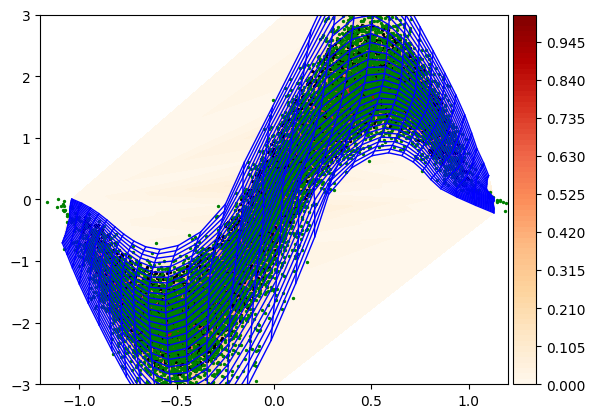

In [32]:
scale=1
factor=3

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1.2*scale,1.2*scale), y_lim=(-3*scale,3*scale),
                                density_function=compute_gaussian_density)

In [81]:
training_set = generate_ellipse(max_num=100000, scale=(0.5,0.2), device=device)
validation_set = generate_ellipse(max_num=10000, scale=(0.5,0.2), device=device)

In [86]:
model_circle = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)
##testNN = NN(num_coupling_layers=119, split_size_x1=1, nn_size=(1, 10)).to(device)
model_circle.train()
model_circle

NN(
  (layers): ModuleList(
    (0-29): 30 x CouplingLayer(
      (t_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (s_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (activation): ReLU()
    )
  )
)

In [87]:
# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [88]:
optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [89]:
num_epoch = 20
batch_size = 1024  # Batch size must be very large! otherwise density gets concentrated if next data point is not in reach
for epoch in range(num_epoch):
    print(epoch)
    training_routine(model_circle, train_loader, optimizer, gaussian_loss_function) 
    print(testing_routine(model_circle, validation_loader, gaussian_loss_function))
    scheduler.step()

0


77it [00:09,  8.31it/s]
62it [00:01, 31.17it/s]


tensor(-12085.6339, device='cuda:0')
1


77it [00:09,  8.20it/s]
62it [00:01, 31.97it/s]


tensor(-12269.7522, device='cuda:0')
2


77it [00:09,  8.18it/s]
62it [00:02, 29.27it/s]


tensor(-12279.1821, device='cuda:0')
3


77it [00:09,  8.13it/s]
62it [00:01, 32.23it/s]


tensor(-12475.2630, device='cuda:0')
4


77it [00:09,  7.96it/s]
62it [00:01, 32.23it/s]


tensor(-12593.2412, device='cuda:0')
5


77it [00:09,  8.29it/s]
62it [00:01, 32.42it/s]


tensor(-12701.9627, device='cuda:0')
6


77it [00:09,  8.22it/s]
62it [00:01, 31.30it/s]


tensor(-12720.6079, device='cuda:0')
7


77it [00:09,  8.17it/s]
62it [00:01, 32.16it/s]


tensor(-12987.9117, device='cuda:0')
8


77it [00:09,  8.26it/s]
62it [00:01, 31.57it/s]


tensor(-12878.7065, device='cuda:0')
9


77it [00:09,  8.21it/s]
62it [00:01, 31.88it/s]


tensor(-12950.1467, device='cuda:0')
10


77it [00:09,  8.25it/s]
62it [00:01, 31.32it/s]


tensor(-13258.7973, device='cuda:0')
11


77it [00:09,  8.19it/s]
62it [00:01, 32.07it/s]


tensor(-13164.8529, device='cuda:0')
12


77it [00:09,  8.16it/s]
62it [00:01, 31.35it/s]


tensor(-13398.0617, device='cuda:0')
13


77it [00:09,  8.18it/s]
62it [00:01, 31.96it/s]


tensor(-13429.9243, device='cuda:0')
14


77it [00:09,  8.15it/s]
62it [00:01, 32.30it/s]


tensor(-13592.2830, device='cuda:0')
15


77it [00:09,  8.18it/s]
62it [00:01, 31.43it/s]


tensor(-13473.6871, device='cuda:0')
16


77it [00:09,  8.18it/s]
62it [00:01, 32.08it/s]


tensor(-13676.9151, device='cuda:0')
17


77it [00:09,  8.14it/s]
62it [00:01, 32.16it/s]


tensor(-13656.8508, device='cuda:0')
18


77it [00:09,  8.12it/s]
62it [00:01, 31.11it/s]


tensor(-13680.8882, device='cuda:0')
19


77it [00:09,  8.11it/s]
62it [00:01, 31.66it/s]

tensor(-13840.0792, device='cuda:0')


0

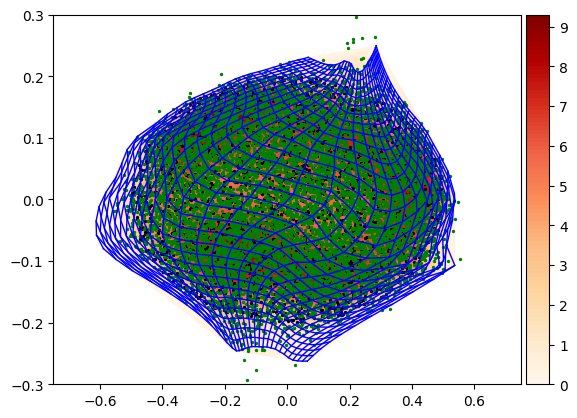

In [90]:
scale=1.5
factor=3

sampling_data = torch.tensor(np.random.normal(size=(10000,2)))
plot_transformed_grid_and_density(model_circle, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-0.5*scale,0.5*scale), y_lim=(-0.2*scale,0.2*scale),
                                density_function=compute_gaussian_density)

In [91]:
sampling_data = generate_ellipse(10900, (0.5, 0.2), device=device) 

with torch.no_grad():
    transformed = model(model_circle(sampling_data), reverse=True)

In [92]:
transformed

tensor([[-0.7063, -1.3697],
        [-0.1303, -0.8871],
        [ 0.1828,  0.8498],
        ...,
        [-0.9005, -0.9501],
        [ 0.1417,  0.5614],
        [ 0.2326,  0.8215]], device='cuda:0')

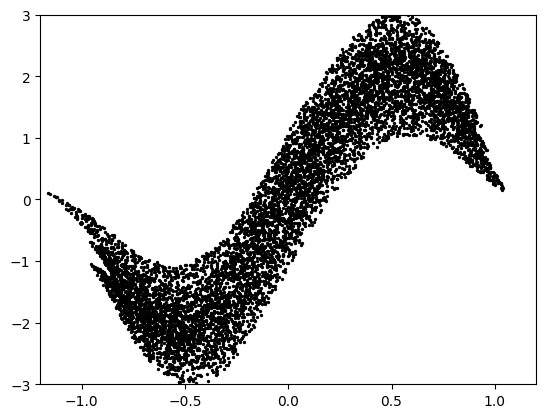

In [93]:
transformed = transformed.detach().to('cpu')

factor = 1
scale = 1

x_range=(-factor, factor)
y_range=(-factor, factor)
x_lim=(-1.2*scale,1.2*scale)
y_lim=(-3*scale,3*scale)

fig, ax = plt.subplots()

plt.xlim(*x_lim)
plt.ylim(*y_lim)

ax.scatter(transformed[:,0], transformed[:,1], c='black', alpha=1, s=2)

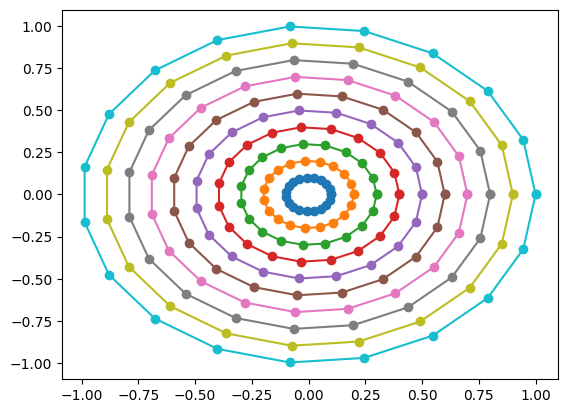

In [167]:
from matplotlib import pyplot as plt

def generate_circle_grid(n_grid_points = 20, n_layers=10):
    angles = np.linspace(0, 2*np.pi, n_grid_points)
    circle = np.stack((np.cos(angles), np.sin(angles)), axis=1)
    circles = [np.stack((np.cos(angles), np.sin(angles)), axis=1)*s for s in np.linspace(0.1,1,n_layers)]
    grid_points = np.concatenate(circles)
    return grid_points

grid_points = generate_circle_grid()

#plt.scatter(circle[:,0], circle[:,1])
for circle in np.split(grid_points, 10):
    plt.plot(circle[:,0], circle[:,1], '-o')

In [ ]:
def grid_loss(circle):
    diff = torch.diff(torch.concatenate((points, points[:1])), axis=0)
    distances = torch.sum(diff**2, axis=1)**0.5
    return torch.sum(distances)

In [57]:
np.random.shuffle(grid_points)
grid_points

array([[-7.89089043e-01,  1.31675672e-01],
       [-3.21356340e-01,  7.32618661e-01],
       [ 7.00000000e-01,  0.00000000e+00],
       [ 1.64084447e-01, -2.51149943e-01],
       [ 4.90970974e-02, -1.93880053e-01],
       [ 6.62072069e-01,  2.27289628e-01],
       [-8.25793455e-02, -9.96584493e-01],
       [-2.03184471e-01, -2.20717173e-01],
       [ 5.46948158e-02, -8.37166478e-02],
       [ 9.45817242e-01,  3.24699469e-01],
       [-6.77281572e-01, -7.35723911e-01],
       [ 1.22742744e-01,  4.84700133e-01],
       [-2.00847712e-01, -4.57886663e-01],
       [-8.25793455e-03,  9.96584493e-02],
       [ 7.10226458e-01,  5.52791441e-01],
       [-4.93180652e-01,  8.22972951e-02],
       [ 1.00000000e-01,  0.00000000e+00],
       [ 3.28168895e-01,  5.02299887e-01],
       [ 1.09389632e-01,  1.67433296e-01],
       [-8.25793455e-02,  9.96584493e-01],
       [ 3.15656204e-01,  2.45685085e-01],
       [-7.89089043e-01, -1.31675672e-01],
       [ 1.47291292e-01, -5.81640160e-01],
       [ 2.

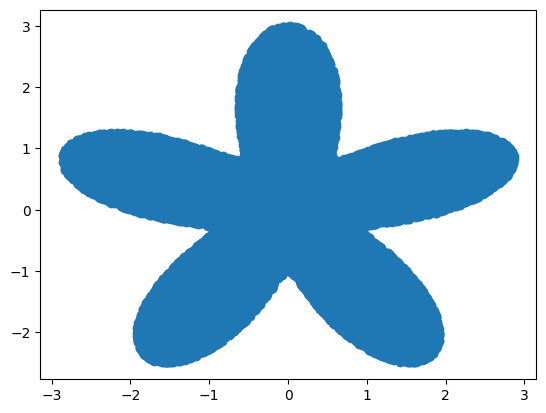

In [205]:
def generate_star(max_num = 10000, n_edges = 4, device='cpu'):
    data = generate_ellipse(max_num, scale=(3,3), device=device)
    angles = torch.arctan2(data[:,1],data[:,0])
    max_amplitude = torch.sin(n_edges*angles)+2
    amplitude = torch.sum(data**2,axis=1)**0.5
    data = data[amplitude <= max_amplitude]
    return data

training_set = generate_star(max_num=100000, n_edges=5, device=device)
validation_set = generate_star(max_num=10000, n_edges=5, device=device)
plt.scatter(np.array(training_set.cpu())[:,0], np.array(training_set.cpu())[:,1])

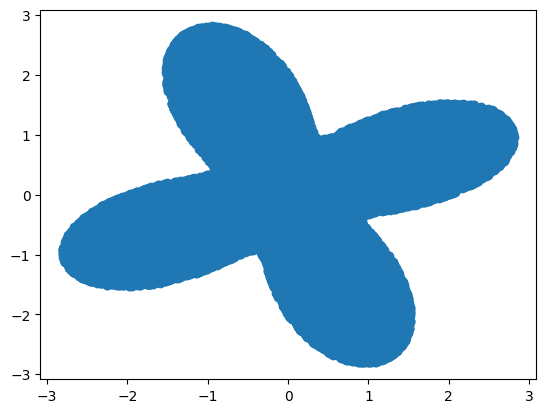

In [29]:
data = generate_ellipse(max_num=100000, scale=(3,3))
angles = torch.arctan(data[:,1]/data[:,0])
max_amplitude = torch.sin(4*angles)+2
amplitude = torch.sum(data**2,axis=1)**0.5
data = data[amplitude <= max_amplitude]
plt.scatter(np.array(data)[:,0], np.array(data)[:,1])

In [3]:
angles = np.linspace(0, 2*np.pi, 2000)
circle = np.stack((np.cos(angles), np.sin(angles)), axis=1)
amplitude = np.sin(5*angles)+2
star = circle*amplitude.reshape(-1,1)

NameError: name 'compute_volume' is not defined

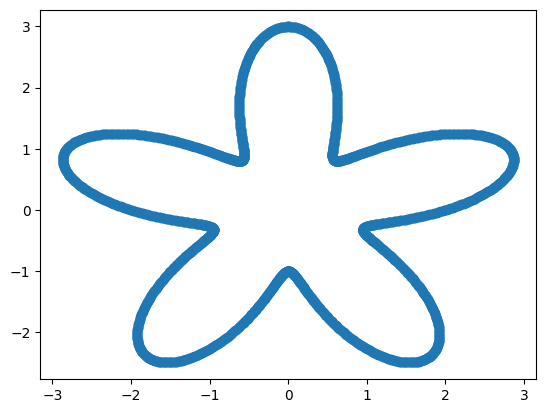

In [4]:
plt.plot(star[:,0], star[:,1], '-o')
# for circle in np.split(grid_points, 10):
#     plt.plot(3*circle[:,0], 3*circle[:,1], '-o')
star = torch.tensor(star, device=device)
compute_volume(torch.tensor(circle))

In [5]:
# Isoperimetrisches Problem

def isoperimetric_loss(points):
    diff = torch.diff(torch.concatenate((points, points[:1])), axis=0)
    distances = torch.sum(diff**2, axis=1)**0.5
    return torch.sum(distances)

def orthogonal_projection(v, grad):
    return grad - grad@v * v / torch.norm(v)**2


In [6]:
def get_grad_vector(model):
    weights = []
    
    for coupling_layer in model.layers:
        for linear_layer in coupling_layer.t_net:
            weights.append(linear_layer.weight.grad)
            weights.append(linear_layer.bias.grad)
        for linear_layer in coupling_layer.s_net:
            weights.append(linear_layer.weight.grad)
            weights.append(linear_layer.bias.grad)

    vector = torch.concatenate([w.flatten() for w in weights])
    return vector

def get_shapes(model):
    shapes = []
    
    for coupling_layer in model.layers:
        for linear_layer in coupling_layer.t_net:
            shapes.append(linear_layer.weight.shape)
            shapes.append(linear_layer.bias.shape)
        for linear_layer in coupling_layer.s_net:
            shapes.append(linear_layer.weight.shape)
            shapes.append(linear_layer.bias.shape)

    return shapes 

def get_weights_from_vector(vector, shapes):
    lengths = [np.prod(s) for s in shapes]
    return [t.reshape(shapes[i]) for i,t in  enumerate(torch.split(vector, lengths))]

def assign_grad_weights(model, grad_weights):
    counter = 0
    
    for coupling_layer in model.layers:
        for linear_layer in coupling_layer.t_net:
            linear_layer.weight.grad = grad_weights[counter]
            counter += 1
            linear_layer.bias.grad = grad_weights[counter]
            counter += 1
        for linear_layer in coupling_layer.s_net:
            linear_layer.weight.grad = grad_weights[counter]
            counter += 1
            linear_layer.bias.grad = grad_weights[counter]
            counter += 1



# weights = []
# shapes = []

# for coupling_layer in model.layers:
#     for linear_layer in coupling_layer.t_net:
#         weights.append(linear_layer.weight.grad)
#         shapes.append(linear_layer.weight.shape)
#         weights.append(linear_layer.bias.grad)
#         shapes.append(linear_layer.bias.shape)
#     for linear_layer in coupling_layer.s_net:
#         weights.append(linear_layer.weight.grad)
#         shapes.append(linear_layer.weight.shape)
#         weights.append(linear_layer.bias.grad)
#         shapes.append(linear_layer.bias.shape)
        
# vector = torch.concatenate([w.flatten() for w in weights])




In [109]:
def compute_area_triangle(points):
    diff = torch.diff(torch.concatenate((points, points[:1])), axis=0)
    distances = torch.sum(diff**2, axis=1)**0.5
    s = torch.sum(distances) / 2
    return (s*torch.prod(s - distances))**0.5
    
points = torch.tensor([[1,2], [3,4], [5,100]])
print(compute_area_triangle(points))

def compute_volume(points, origin=torch.tensor([0,0], device=device, requires_grad=False)):
    sum_vol = 0
    for i in range(points.shape[0]-1):
        #print(compute_area_triangle(torch.concatenate([origin, points[i], points[i+1]]).reshape(3,2)))
        sum_vol += compute_area_triangle(torch.concatenate([origin, points[i], points[i+1]]).reshape(3,2))
    sum_vol +=compute_area_triangle(torch.concatenate([origin, points[-1], points[0]]).reshape(3,2))
    return sum_vol


def compute_area(points, origin=torch.tensor([0.,0.], device=device, requires_grad=False)):
    repeated = origin.repeat(points.shape[0], 1)
    stacked_points = torch.stack((repeated, points, torch.roll(points, -1, 0), repeated))
    t=torch.diff(stacked_points, axis=0)
    length=torch.sum(t**2, axis=2)**0.5
    s = torch.sum(length, axis=0)/2
    area_triangles=torch.prod(s-length,axis=0)**0.5 *s**0.5#, s, length, s-length
    area=torch.sum(area_triangles)
    return area


def compute_area2(points, origin=torch.tensor([0.,0.], device=device, requires_grad=False)):
    coordinates = points - origin
    
    return torch.sum(torch.sum(coordinates**2, axis=1)**0.5)

tensor(94.0000)


In [67]:
model = NN(num_coupling_layers=30, split_size_x1=1, nn_size=(1, 10)).to(device)

#torch.nn.Dropout(p=0.5, inplace=False)
##testNN = NN(num_coupling_layers=119, split_size_x1=1, nn_size=(1, 10)).to(device)
#model.train()

tensor(3.1416)

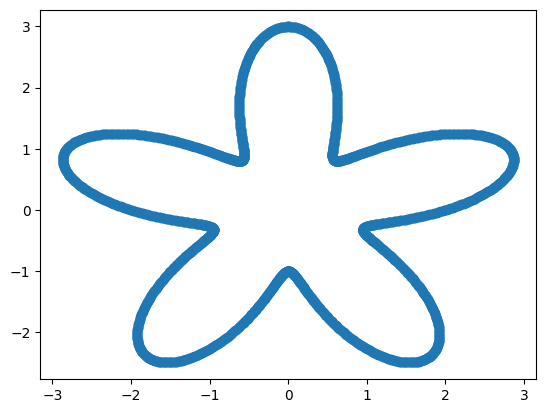

In [9]:
angles = np.linspace(0, 2*np.pi, 2000)
circle = np.stack((np.cos(angles), np.sin(angles)), axis=1)
amplitude = np.sin(5*angles)+2
star = circle*amplitude.reshape(-1,1)

plt.plot(star[:,0], star[:,1], '-o')
# for circle in np.split(grid_points, 10):
#     plt.plot(3*circle[:,0], 3*circle[:,1], '-o')
star = torch.tensor(star, device=device, requires_grad=False)
star = torch.concatenate((torch.tensor([[0.,0.]], device=device, requires_grad = False), star))
compute_volume(torch.tensor(circle),origin=torch.tensor([0,0], device='cpu', requires_grad=False))

In [531]:
compute_volume(star), compute_area(star)

(tensor(12.2112, device='cuda:0'), tensor(12.2112, device='cuda:0'))

In [517]:
origin=torch.tensor([0.,0.], device=device, requires_grad=False)
repeated = origin.repeat(star.shape[0], 1)
#print(repeated)
#star = torch.roll(star, -1, 0)
stacked_points = torch.stack((repeated, star, torch.roll(star, -1, 0), repeated))
t=torch.diff(stacked_points, axis=0)
length=torch.sum(t**2, axis=2)**0.5
s = torch.sum(length, axis=0)/2
area_triangles=torch.prod(s-length,axis=0)**0.5 *s**0.5#, s, length, s-length
area=torch.sum(area_triangles)
area

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]], device='cuda:0')


tensor(12.2112, device='cuda:0')

In [161]:
def training_routine_isoperimetric(model, train_data, optimizer):
    torch.autograd.set_detect_anomaly(True)
    model.train()
    #train_loss = 0

    # get volume grad
    optimizer.zero_grad(set_to_none=True)
    output = model(train_data)
    origin = output[:1]
    volume = compute_area(output[1:], origin)
    volume.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1, norm_type=1)
    volume_grad = get_grad_vector(model)
    #print(volume, volume_grad[:10])
    print('volume', volume)
    
    # get loss grad
    optimizer.zero_grad(set_to_none=True)
    output = model(train_data[1:])
    loss = isoperimetric_loss(output)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1, norm_type=1)
    
    # project on subspace
    grad = get_grad_vector(model)
    #print(grad[:10])
    grad_projected = orthogonal_projection(volume_grad, grad)
    #print(grad_projected[:10])
    shapes = get_shapes(model)
    grad_weigths = get_weights_from_vector(grad_projected, shapes)
    
    # assign values
    assign_grad_weights(model, grad_weigths)

    # train step
    #nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1, norm_type=1)
    optimizer.step()
    loss = loss.detach()
    print('loss', loss)
    return volume_grad, grad 

In [162]:
model = NN(num_coupling_layers=12, split_size_x1=1, nn_size=(1, 5)).to(device)


In [163]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.3, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.99)
#num_epoch = 20

In [164]:
%%time

for _ in range(100):
    v,g = training_routine_isoperimetric(model, star, optimizer)
    #scheduler.step()

volume tensor(4.8814, device='cuda:0', grad_fn=<SumBackward0>)
loss tensor(15.3068, device='cuda:0')


D:\master-thesis\venv\Lib\site-packages\torch\autograd\__init__.py:266: UserWarning: Error detected in ProdBackward1. Traceback of forward call that caused the error:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\master-thesis\venv\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "D:\master-thesis\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "D:\master-thesis\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "D:\master-thesis\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 638, in run_forever
    self._run_once()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py

RuntimeError: Function 'ProdBackward1' returned nan values in its 0th output.

In [190]:
shapes = get_shapes(model)
weights = get_weights_from_vector(v, shapes)
weights

[tensor([[ 3.5272e-07],
         [-1.0577e-07],
         [-4.2968e-08],
         [ 3.7113e-07],
         [ 8.0588e-07],
         [ 2.2180e-07],
         [ 1.6783e-07],
         [-2.3981e-07],
         [ 2.2071e-07],
         [ 1.5043e-07]], device='cuda:0'),
 tensor([-3.4690e-07,  1.0680e-07,  3.1729e-08, -3.7788e-07, -7.8265e-07,
         -1.2924e-07, -2.6199e-07,  5.8562e-08, -9.6016e-08, -1.9219e-07],
        device='cuda:0'),
 tensor([[-1.6591e-07, -2.2216e-07, -1.3072e-07, -1.1868e-07, -1.3569e-07,
          -1.7448e-07, -5.4350e-08, -2.5792e-07, -1.5404e-07, -7.0565e-08],
         [ 2.8605e-07,  4.3337e-07,  1.9410e-07,  1.9806e-07,  2.2655e-07,
           1.8733e-07,  7.3912e-08,  5.0836e-07,  1.7405e-07,  1.4142e-07],
         [ 1.8769e-08,  2.5755e-08,  1.4632e-08,  1.3491e-08,  1.5423e-08,
           1.8807e-08,  6.0253e-09,  2.9972e-08,  1.6796e-08,  8.2182e-09],
         [ 1.7678e-07,  2.3979e-07,  1.3581e-07,  1.2517e-07,  1.4312e-07,
           1.7578e-07,  5.5875e-08,  2

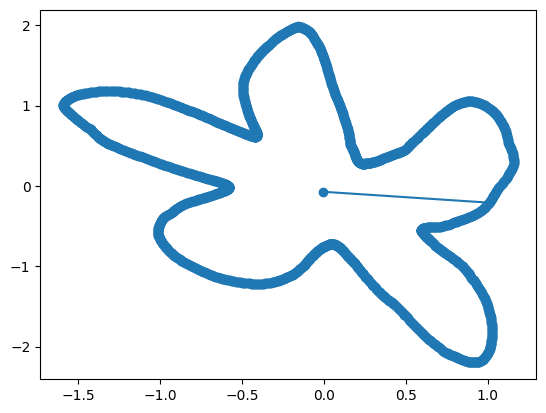

In [166]:
transformed = model(star)
transformed = transformed.detach().to('cpu')
transformed = np.array(transformed)

plt.plot(transformed[:,0], transformed[:,1], '-o')
#origin = model(torch.tensor([[0.,0.]]).to(device))
#compute_volume(torch.tensor(transformed), origin[0].to('cpu'))

tensor(27.1692, grad_fn=<AddBackward0>)

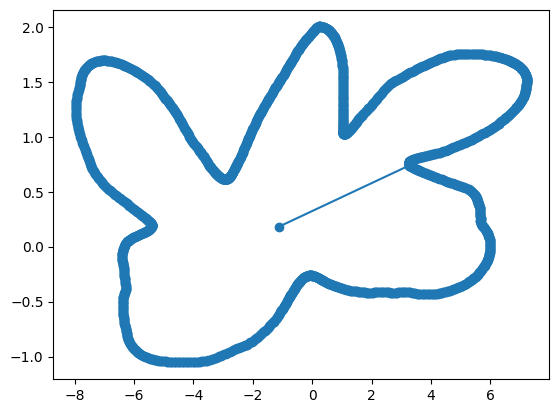

In [128]:
transformed = model(star)
transformed = transformed.detach().to('cpu')
transformed = np.array(transformed)

plt.plot(transformed[:,0], transformed[:,1], '-o')
origin = model(torch.tensor([[0.,0.]]).to(device))
compute_volume(torch.tensor(transformed), origin[0].to('cpu'))

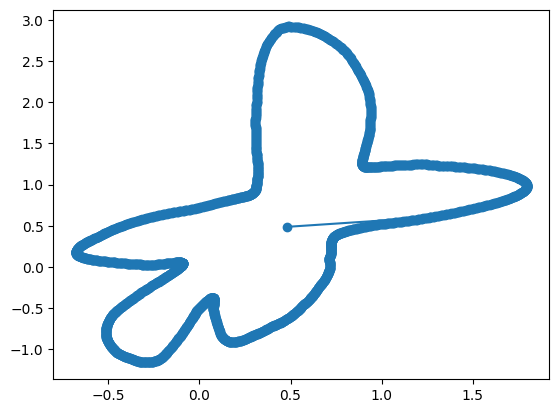

In [155]:
transformed = model(star)
transformed = transformed.detach().to('cpu')
transformed = np.array(transformed)

plt.plot(transformed[:,0], transformed[:,1], '-o')
#origin = model(torch.tensor([[0.,0.]]).to(device))
#compute_volume(torch.tensor(transformed), origin[0].to('cpu'))

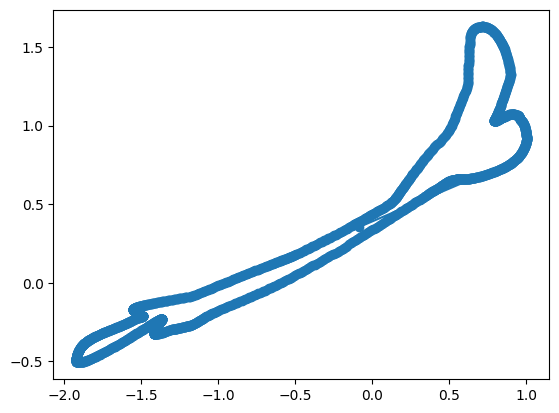

In [160]:
transformed = model(star)
transformed = transformed.detach().to('cpu')
transformed = np.array(transformed)

plt.plot(transformed[:,0], transformed[:,1], '-o')
#origin = model(torch.tensor([[0.,0.]]).to(device))
#compute_volume(torch.tensor(transformed), origin[0].to('cpu'))

## In comparison if we use uniform distribution for log likelihood loss function

In [124]:
testNN = NN(num_coupling_layers=30, layer_size=2, split_size_x1=1, nn_size=(1, 10)).to(device)
testNN.train()
testNN

NN(
  (layers): ModuleList(
    (0-29): 30 x CouplingLayer(
      (t_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (s_net): ModuleList(
        (0): Linear(in_features=1, out_features=10, bias=True)
        (1): Linear(in_features=10, out_features=10, bias=True)
        (2): Linear(in_features=10, out_features=1, bias=True)
      )
      (activation): ReLU()
    )
  )
)

In [125]:
# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(training_set, batch_size=1024, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=128, shuffle=False)

In [126]:
from torch.optim.lr_scheduler import StepLR

optimizer = torch.optim.SGD(testNN.parameters(), lr=0.8, momentum=0.8)
scheduler = StepLR(optimizer, step_size=1, gamma=0.95)
num_epoch = 20

In [130]:
from functions import uniform_circle_loss_function_method2

num_epoch = 20
for epoch in range(num_epoch):
    training_routine(testNN, train_loader, optimizer, uniform_circle_loss_function_method2) 
    print(testing_routine(testNN, validation_loader, uniform_circle_loss_function_method2))
    scheduler.step()

77it [00:09,  8.39it/s]
62it [00:02, 28.74it/s]


tensor(6767.9961, device='cuda:0')


77it [00:09,  8.29it/s]
62it [00:01, 31.88it/s]


tensor(3183.4838, device='cuda:0')


77it [00:09,  7.92it/s]
62it [00:01, 31.20it/s]


tensor(2985.7853, device='cuda:0')


77it [00:09,  7.92it/s]
62it [00:02, 30.33it/s]


tensor(4275.7457, device='cuda:0')


77it [00:09,  8.26it/s]
62it [00:01, 32.30it/s]


tensor(6228.3593, device='cuda:0')


77it [00:09,  8.17it/s]
62it [00:02, 30.62it/s]


tensor(2838.6433, device='cuda:0')


77it [00:09,  8.31it/s]
62it [00:01, 31.79it/s]


tensor(3532.7796, device='cuda:0')


77it [00:09,  8.30it/s]
62it [00:02, 30.71it/s]


tensor(2276.9529, device='cuda:0')


77it [00:09,  8.44it/s]
62it [00:01, 31.56it/s]


tensor(3931.3502, device='cuda:0')


77it [00:09,  8.44it/s]
62it [00:02, 30.54it/s]


tensor(7627.5845, device='cuda:0')


77it [00:09,  8.42it/s]
62it [00:01, 31.04it/s]


tensor(2265.9411, device='cuda:0')


77it [00:09,  8.17it/s]
62it [00:02, 30.92it/s]


tensor(2715.8930, device='cuda:0')


77it [00:09,  8.29it/s]
62it [00:01, 31.36it/s]


tensor(2354.2742, device='cuda:0')


77it [00:09,  8.53it/s]
62it [00:01, 32.29it/s]


tensor(2746.4224, device='cuda:0')


77it [00:09,  8.25it/s]
62it [00:01, 31.89it/s]


tensor(2251.6858, device='cuda:0')


77it [00:09,  8.46it/s]
62it [00:01, 31.27it/s]


tensor(1910.4046, device='cuda:0')


77it [00:09,  8.40it/s]
62it [00:01, 31.33it/s]


tensor(2466.7448, device='cuda:0')


77it [00:09,  8.22it/s]
62it [00:01, 31.38it/s]


tensor(2267.4956, device='cuda:0')


77it [00:09,  8.15it/s]
62it [00:01, 31.13it/s]


tensor(2225.2159, device='cuda:0')


77it [00:09,  8.10it/s]
62it [00:01, 31.28it/s]

tensor(1973.5580, device='cuda:0')


0

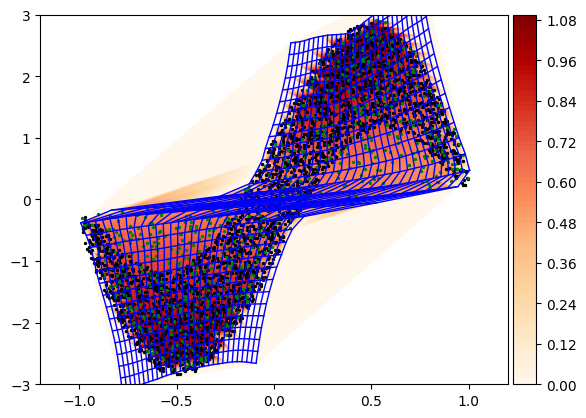

In [131]:
scale=1
factor=1

sampling_data = generate_ellipse(1000, (1, 1))
plot_transformed_grid_and_density(testNN, training_set.to('cpu'), device, sampling_data, grid_width=30,
                                x_range=(-factor, factor), y_range=(-factor, factor), x_lim=(-1.2*scale,1.2*scale), y_lim=(-3*scale,3*scale),
                                density_function=compute_uniform_circle_density)

In [91]:
sampling_data

tensor(997.6569)

In [478]:
layers = []
for j in range(len(testNN.layers)):
    layers.append("layers.{}".format(j))
print(layers)
saved_layers = register_activation_hooks(testNN, layers_to_save=layers)

['layers.0']


In [479]:
output = testNN(train_set)

tensor([[0., 0.],
        [0., 0.]])
tensor([[1.0208, 1.0000],
        [1.9525, 2.0000]], grad_fn=<CopySlices>) tensor([-0.0812, -0.1003], grad_fn=<SumBackward1>)


In [480]:
saved_layers

{'layers.0': [(tensor([[1.0208, 1.0000],
           [1.9525, 2.0000]], grad_fn=<CopySlices>),
   tensor([-0.0812, -0.1003], grad_fn=<SumBackward1>))]}

In [481]:
output

tensor([[1.0208, 1.0000],
        [1.9525, 2.0000]], grad_fn=<CopySlices>)

In [482]:
def gaussian_loss_function(output, layers):
    N, D = output.shape  # batch size and single output size
    #print(layers)
    """First summand"""
    constant = torch.from_numpy(np.array(0.5 * D * N * np.log(np.pi))).type(torch.float32)

    """Second summand"""
    sum_squared_mappings = torch.square(output)
    sum_squared_mappings = torch.sum(sum_squared_mappings)
    sum_squared_mappings = 0.5 * sum_squared_mappings

    """Determinants"""
    temp = [torch.reshape(layers[f'layers.{i}'][0][1], (-1, 1)) for i in range(len(layers))]
    log_dets = torch.cat(temp, axis=1)
    sum_log_dets = torch.sum(log_dets)

    #reset_computation_graph_term =  sum([layers[f'layers.{i}'][0][0].sum() for i in range(len(layers))])*0
    # for i in range(len(layers)):
    #     layers[f'layers.{i}'][0][0].detach_()
    
    
    return constant + sum_squared_mappings - sum_log_dets #+ reset_computation_graph_term

In [483]:
loss = gaussian_loss_function(output, saved_layers)

In [484]:
loss

tensor(7.3981, grad_fn=<SubBackward0>)

In [485]:
loss.backward()

RuntimeError: Trying to use a saved tensor that has been detached in-place, i.e. with .detach_().This is not supported, please use out-of-place `.detach()` instead

In [460]:
for l in testNN.layers[0].t_net:
    print(l.weight.grad)
print('aa')
for l in testNN.layers[0].s_net:
    print(l.weight.grad)


tensor([[ 0.0298],
        [-0.0199],
        [ 0.0000],
        [ 0.0161],
        [ 0.0557],
        [-0.0491],
        [-0.0266],
        [-0.0078],
        [ 0.0743],
        [ 0.0000]])
tensor([[ 0.0010,  0.0251,  0.0000,  0.0148,  0.0300,  0.0052,  0.0104,  0.0242,
          0.0185,  0.0000],
        [ 0.0019,  0.0455,  0.0000,  0.0269,  0.0544,  0.0095,  0.0188,  0.0438,
          0.0335,  0.0000],
        [-0.0022, -0.0548, -0.0000, -0.0324, -0.0655, -0.0114, -0.0226, -0.0527,
         -0.0403, -0.0000],
        [-0.0017, -0.0417, -0.0000, -0.0246, -0.0499, -0.0087, -0.0172, -0.0401,
         -0.0307, -0.0000],
        [-0.0023, -0.0556, -0.0000, -0.0328, -0.0665, -0.0116, -0.0229, -0.0535,
         -0.0409, -0.0000],
        [-0.0022, -0.0535, -0.0000, -0.0316, -0.0640, -0.0112, -0.0221, -0.0515,
         -0.0393, -0.0000],
        [ 0.0032,  0.0792,  0.0000,  0.0468,  0.0947,  0.0165,  0.0327,  0.0763,
          0.0583,  0.0000],
        [ 0.0028,  0.0686,  0.0000,  0.0405,  

In [313]:
saved_layers, output

({'layers.0': [(tensor([[1.0000, 1.3754]], grad_fn=<CopySlices>),
    tensor([0.0685], grad_fn=<SumBackward1>))]},
 tensor([[1.0000, 1.3754]], grad_fn=<CopySlices>))

In [297]:
a = [torch.reshape(saved_layers[f'layers.{i}'][0][1], (-1, 1)) for i in range(len(saved_layers))]

In [298]:
loss = 2*a[0]

In [474]:
saved_layers[f'layers.{0}'][0][0].detach_()

tensor([[1.0208, 1.0000],
        [1.9525, 2.0000]])

In [475]:
saved_layers

{'layers.0': [(tensor([[1.0208, 1.0000],
           [1.9525, 2.0000]]),
   tensor([-0.0812, -0.1003], grad_fn=<SumBackward1>))]}